<a href="https://colab.research.google.com/github/tamayodb/CCDATSCL_EXERCISES_COM222/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

<img src="https://vsqfvsosprmjdktwilrj.supabase.co/storage/v1/object/public/images/insights/1753644539114-netflix.jpeg"/>


In this activity , you will explore two fundamental preprocessing techniques used in data science and machine learning: feature scaling and discretization (binning).

These techniques are essential when working with datasets that contain numerical values on very different scales, or continuous variables that may be more useful when grouped into categories.


We will use a subset of the Netflix Movies and TV Shows dataset, which contains metadata such as release year, duration, ratings, and other attributes of titles currently or previously available on Netflix. Although the dataset is not originally designed for numerical modeling, it contains several features suitable for preprocessing practice—such as:
-Release Year
-Duration (in minutes)
-Number of Cast Members
-Number of Listed Genres
-Title Word Count

In this worksheet, you will:
- Load and inspect the dataset
- Select numerical features for scaling
- Apply different scaling techniques
- Min–Max Scaling
- Standardization
- Robust Scaling
- Perform discretization (binning)
- Equal-width binning
- Equal-frequency binning
- Evaluate how scaling affects machine learning performance, using a simple KNN

Create a feature matrix X using any two numeric columns and a target y (e.g., classification by genre or type). Create a train/test split.

In [1]:
import pandas as pd
import os
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub


## 1. Setup and Data Loading



Load the Netflix dataset into a DataFrame named df.

In [2]:

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)


if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows
True
Path to dataset files: /kaggle/input/netflix-shows
True


## 2. Data Understanding

Store the dataset’s column names in a variable called cols.

In [3]:
cols = df.columns.tolist()
display(cols)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

Store the shape of the dataset as a tuple (rows, columns) in shape_info.

In [4]:
shape_info = df.shape
display(shape_info)

(8807, 12)

## 3. Data Cleaning
Count missing values per column and save to missing_counts.

In [5]:
missing_counts = df.isnull().sum()
display(missing_counts)

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Drop rows where duration is missing. Save to df_clean.

In [7]:
df_clean = df.dropna(subset=['duration'])
display(df_clean.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Converting duration column to minutes


In [ ]:
print(f"Data type of 'duration' column: {df_clean['duration'].dtype}")
print(f"Number of unique values in 'duration' column: {df_clean['duration'].nunique()}")
print("Top 50 most frequent unique values in 'duration' column:")
display(df_clean['duration'].value_counts().head(50))

Data type of 'duration' column: object
Number of unique values in 'duration' column: 220
Top 50 most frequent unique values in 'duration' column:


,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
90 min,152
97 min,146
94 min,146
93 min,146
91 min,144
95 min,137


In [ ]:
df_movies = df_clean[df_clean['type'] == 'Movie'].copy()
df_movies['duration_minutes'] = df_movies['duration'].str.replace(' min', '').astype(int)

display(df_movies.head())
df_movies.info()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


<class 'pandas.core.frame.DataFrame'>
Index: 6128 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   show_id           6128 non-null   object
 1   type              6128 non-null   object
 2   title             6128 non-null   object
 3   director          5940 non-null   object
 4   cast              5653 non-null   object
 5   country           5688 non-null   object
 6   date_added        6128 non-null   object
 7   release_year      6128 non-null   int64 
 8   rating            6126 non-null   object
 9   duration          6128 non-null   object
 10  listed_in         6128 non-null   object
 11  description       6128 non-null   object
 12  duration_minutes  6128 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 670.2+ KB


In [ ]:
df_tv_shows = df_clean[df_clean['type'] == 'TV Show'].copy()
df_tv_shows['duration_seasons'] = df_tv_shows['duration'].str.replace(' Seasons| Season', '', regex=True).astype(int)

display(df_tv_shows.head())
df_tv_shows.info()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_seasons
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1


<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 1 to 8803
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   show_id           2676 non-null   object
 1   type              2676 non-null   object
 2   title             2676 non-null   object
 3   director          230 non-null    object
 4   cast              2326 non-null   object
 5   country           2285 non-null   object
 6   date_added        2666 non-null   object
 7   release_year      2676 non-null   int64 
 8   rating            2674 non-null   object
 9   duration          2676 non-null   object
 10  listed_in         2676 non-null   object
 11  description       2676 non-null   object
 12  duration_seasons  2676 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 292.7+ KB


In [ ]:
df_movies = df_movies.rename(columns={'duration_minutes': 'duration'})
df_tv_shows = df_tv_shows.rename(columns={'duration_seasons': 'duration'})

df_combined = pd.concat([df_movies, df_tv_shows], ignore_index=True)

display(df_combined.head())
df_combined.info()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8804 entries, 0 to 8803
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6170 non-null   object
 4   cast          7979 non-null   object
 5   country       7973 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
 12  duration      8804 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 894.3+ KB


In [ ]:
df_movies = df_movies.drop(columns=['duration']).rename(columns={'duration_minutes': 'duration'})
df_tv_shows = df_tv_shows.drop(columns=['duration']).rename(columns={'duration_seasons': 'duration'})

df_combined = pd.concat([df_movies, df_tv_shows], ignore_index=True)

display(df_combined.head())
df_combined.info()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,"Dramas, International Movies",After most of her family is murdered in a terr...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8804 entries, 0 to 8803
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6170 non-null   object
 4   cast          7979 non-null   object
 5   country       7973 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8800 non-null   object
 9   listed_in     8804 non-null   object
 10  description   8804 non-null   object
dtypes: int64(1), object(10)
memory usage: 756.7+ KB


In [ ]:
df_movies = df_clean[df_clean['type'] == 'Movie'].copy()
df_tv_shows = df_clean[df_clean['type'] == 'TV Show'].copy()

df_movies['duration_minutes'] = df_movies['duration'].str.replace(' min', '').astype(int)
df_movies = df_movies.drop(columns=['duration']).rename(columns={'duration_minutes': 'duration'})

df_tv_shows['duration_seasons'] = df_tv_shows['duration'].str.replace(' Seasons| Season', '', regex=True).astype(int)
df_tv_shows = df_tv_shows.drop(columns=['duration']).rename(columns={'duration_seasons': 'duration'})

df_combined = pd.concat([df_movies, df_tv_shows], ignore_index=True)

display(df_combined.head())
df_combined.info()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,"Dramas, International Movies",After most of her family is murdered in a terr...,127


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8804 entries, 0 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6170 non-null   object
 4   cast          7979 non-null   object
 5   country       7973 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8800 non-null   object
 9   listed_in     8804 non-null   object
 10  description   8804 non-null   object
 11  duration      8804 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 825.5+ KB


In [ ]:
print(df_combined['duration'].dtype)

int64


####  Convert TV Show Duration to Minutes
**Assumption:**
For the purpose of this exercise, we will assume:
- An average TV show season has approximately **10 episodes**.
- An average TV show episode is approximately **50 minutes** long.

Therefore, the conversion will be: `duration (seasons) * 10 episodes/season * 50 minutes/episode`.

In [ ]:
df_tv_shows['duration'] = df_tv_shows['duration'] * 10 * 50
display(df_tv_shows.head())
df_tv_shows.info()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1000
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,500
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",500
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1000
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,500


<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 1 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2676 non-null   object
 1   type          2676 non-null   object
 2   title         2676 non-null   object
 3   director      230 non-null    object
 4   cast          2326 non-null   object
 5   country       2285 non-null   object
 6   date_added    2666 non-null   object
 7   release_year  2676 non-null   int64 
 8   rating        2674 non-null   object
 9   listed_in     2676 non-null   object
 10  description   2676 non-null   object
 11  duration      2676 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 271.8+ KB


In [ ]:
df_unified_duration = pd.concat([df_movies, df_tv_shows], ignore_index=True)

display(df_unified_duration[['type', 'duration']].tail())
display(df_unified_duration.info())

,type,duration
8799,TV Show,1000
8800,TV Show,1000
8801,TV Show,1500
8802,TV Show,500
8803,TV Show,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8804 entries, 0 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6170 non-null   object
 4   cast          7979 non-null   object
 5   country       7973 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8800 non-null   object
 9   listed_in     8804 non-null   object
 10  description   8804 non-null   object
 11  duration      8804 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 825.5+ KB


None

4. Selecting Relevant Numeric Features

Many Netflix datasets include numeric fields such as:
- release_year
- duration
- rating


Create a DataFrame `df_num` containing only numeric columns.

In [21]:
df_num = df_unified_duration.select_dtypes(include=['number'])
display(df_num.tail())

,release_year,duration
8799,2015,1000
8800,2016,1000
8801,2016,1500
8802,2012,500
8803,2018,1000


In [27]:
print("Descriptive statistics for 'release_year' and 'duration':")
display(df_num[['release_year', 'duration']].describe())

Descriptive statistics for 'release_year' and 'duration':


,release_year,duration
count,8804.000000,8804.000000
mean,2014.180259,337.540777
std,8.820647,566.175573
min,1925.000000,3.000000
25%,2013.000000,92.000000
50%,2017.000000,112.000000
75%,2019.000000,500.000000
max,2021.000000,8500.000000


## 5. Feature Scaling

Focus on a single numeric column (e.g., duration).


Extract the column duration into a Series named `dur`.

In [22]:
dur = df_unified_duration['duration']
display(dur.head())

,duration
0,90
1,91
2,125
3,104
4,127


Apply Min–Max Scaling to `dur`. Store the result as `dur_minmax`.

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
dur_minmax = scaler_minmax.fit_transform(dur.values.reshape(-1, 1))
dur_minmax = pd.Series(dur_minmax.flatten(), name='dur_minmax_scaled')

display(dur_minmax.head())

,dur_minmax_scaled
0,0.010239
1,0.010357
2,0.014358
3,0.011887
4,0.014593


Apply Z-score Standardization to `dur`. Store in `dur_zscore`.

In [25]:
from sklearn.preprocessing import StandardScaler

scaler_zscore = StandardScaler()
dur_zscore = scaler_zscore.fit_transform(dur.values.reshape(-1, 1))
dur_zscore = pd.Series(dur_zscore.flatten(), name='dur_zscore_scaled')

display(dur_zscore.head())

,dur_zscore_scaled
0,-0.437240
1,-0.435474
2,-0.375419
3,-0.412512
4,-0.371886


## 6. Discretization (Binning)
Apply equal-width binning to dur into 4 bins. Store as `dur_width_bins`.


- Use `pandas.cut()` to divide duration_minutes into 4 `equal-width bins`.
- Add the resulting bins as a new column named:
`duration_equal_width_bin`

Describe the characteristics of each bin

- What are the bin edges produced by equal-width binning?
- How many movies fall into each bin?

In [50]:
df_unified_duration['duration_equal_width_bin'] = pd.cut(dur, bins=4, include_lowest=True)
display(df_unified_duration[['duration', 'duration_equal_width_bin']].head())

print("Bin edges:")
display(df_unified_duration['duration_equal_width_bin'].value_counts(sort=False).index.values)

print("Count per bin:")
display(df_unified_duration['duration_equal_width_bin'].value_counts(sort=False))

,duration,duration_equal_width_bin
0,90,"(-5.498, 2127.25]"
1,91,"(-5.498, 2127.25]"
2,125,"(-5.498, 2127.25]"
3,104,"(-5.498, 2127.25]"
4,127,"(-5.498, 2127.25]"


Bin edges:


[(-5.498, 2127.25], (2127.25, 4251.5], (4251.5, 6375.75], (6375.75, 8500.0]]
Categories (4, interval[float64, right]): [(-5.498, 2127.25] < (2127.25, 4251.5] < (4251.5, 6375.75] <
                                           (6375.75, 8500.0]]

Count per bin:


,count
duration_equal_width_bin,
"(-5.498, 2127.25]",8640
"(2127.25, 4251.5]",138
"(4251.5, 6375.75]",20
"(6375.75, 8500.0]",6


/tmp/ipython-input-931794890.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='duration_equal_width_bin', data=df_unified_duration, palette='viridis')


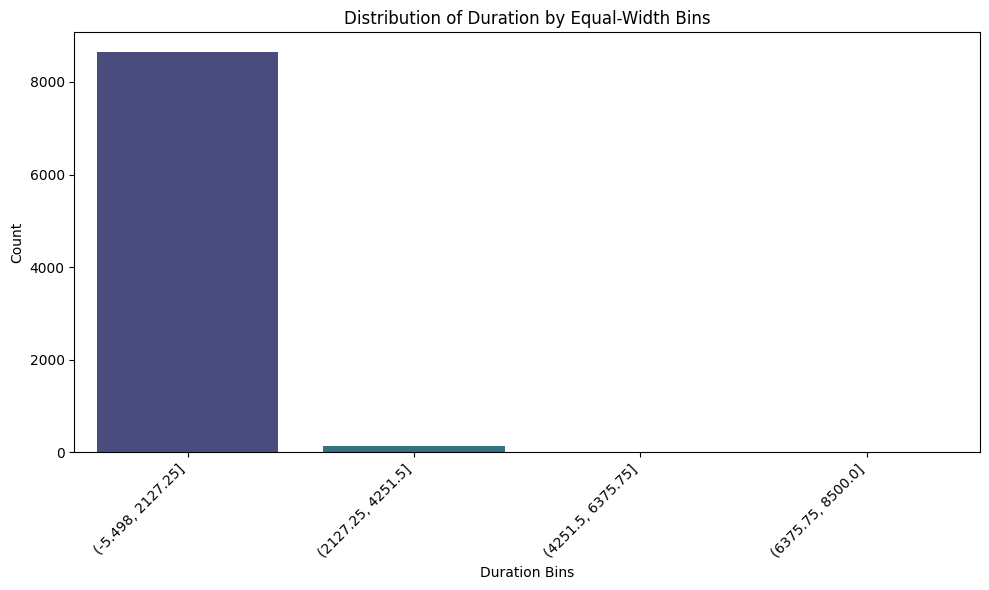

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='duration_equal_width_bin', data=df_unified_duration, palette='viridis')
plt.title('Distribution of Duration by Equal-Width Bins')
plt.xlabel('Duration Bins')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Apply equal-frequency binning to dur into 4 bins. Store as `dur_width_bins`.


- Use `pandas.cut()` to divide duration_minutes into 4 `equal-width bins`.
- Add the resulting bins as a new column named:
`duration_equal_width_bin`

Describe the characteristics of each bin

*   What are the bin ranges produced by equal-frequency binning?
*   How many movies fall into each bin? Are they nearly equal?




In [53]:
df_unified_duration['duration_equal_freq_bin'] = pd.qcut(dur, q=4, duplicates='drop')
display(df_unified_duration[['duration', 'duration_equal_freq_bin']].head())

print("Bin edges:")
display(df_unified_duration['duration_equal_freq_bin'].value_counts(sort=False).index.values)

print("Count per bin:")
display(df_unified_duration['duration_equal_freq_bin'].value_counts(sort=False))

,duration,duration_equal_freq_bin
0,90,"(2.999, 92.0]"
1,91,"(2.999, 92.0]"
2,125,"(112.0, 500.0]"
3,104,"(92.0, 112.0]"
4,127,"(112.0, 500.0]"


Bin edges:


[(2.999, 92.0], (92.0, 112.0], (112.0, 500.0], (500.0, 8500.0]]
Categories (4, interval[float64, right]): [(2.999, 92.0] < (92.0, 112.0] < (112.0, 500.0] <
                                           (500.0, 8500.0]]

Count per bin:


,count
duration_equal_freq_bin,
"(2.999, 92.0]",2263
"(92.0, 112.0]",2212
"(112.0, 500.0]",3446
"(500.0, 8500.0]",883


/tmp/ipython-input-885401939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='duration_equal_freq_bin', data=df_unified_duration, palette='viridis')


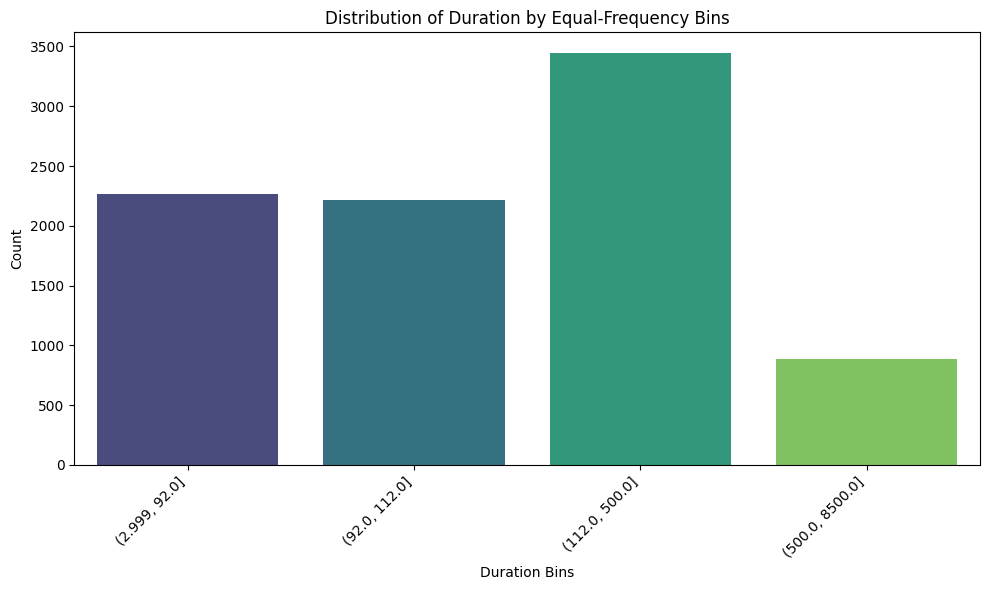

In [55]:

plt.figure(figsize=(10, 6))
sns.countplot(x='duration_equal_freq_bin', data=df_unified_duration, palette='viridis')
plt.title('Distribution of Duration by Equal-Frequency Bins')
plt.xlabel('Duration Bins')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [56]:
print("Head of df_unified_duration showing both types and binned values:")
display(df_unified_duration[['type', 'duration', 'dur_minmax_equal_width_bin', 'dur_zscore_equal_freq_bin']].head())

print("\nTail of df_unified_duration showing both types and binned values:")
display(df_unified_duration[['type', 'duration', 'dur_minmax_equal_width_bin', 'dur_zscore_equal_freq_bin']].tail())

Head of df_unified_duration showing both types and binned values:


,type,duration,dur_minmax_equal_width_bin,dur_zscore_equal_freq_bin
0,Movie,90,"(-0.002, 0.25]","(-0.592, -0.434]"
1,Movie,91,"(-0.002, 0.25]","(-0.592, -0.434]"
2,Movie,125,"(-0.002, 0.25]","(-0.398, 0.287]"
3,Movie,104,"(-0.002, 0.25]","(-0.434, -0.398]"
4,Movie,127,"(-0.002, 0.25]","(-0.398, 0.287]"



Tail of df_unified_duration showing both types and binned values:


,type,duration,dur_minmax_equal_width_bin,dur_zscore_equal_freq_bin
8799,TV Show,1000,"(-0.002, 0.25]","(0.287, 14.418]"
8800,TV Show,1000,"(-0.002, 0.25]","(0.287, 14.418]"
8801,TV Show,1500,"(-0.002, 0.25]","(0.287, 14.418]"
8802,TV Show,500,"(-0.002, 0.25]","(-0.398, 0.287]"
8803,TV Show,1000,"(-0.002, 0.25]","(0.287, 14.418]"


## 7. KNN Before & After Scaling


Create a feature matrix X using any two numeric columns and a target y (e.g., classification by genre or type). Create a train/test split.

Train a KNN classifier without scaling. Store accuracy in acc_raw.

In [57]:
from sklearn.model_selection import train_test_split

X = df_unified_duration[['release_year', 'duration']]

y = df_unified_duration['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

Training features shape: (7043, 2)
Testing features shape: (1761, 2)


In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)

y_pred_raw = knn_raw.predict(X_test)

acc_raw = accuracy_score(y_test, y_pred_raw)

print(f"KNN Accuracy (Raw Data): {acc_raw:.4f}")

KNN Accuracy (Raw Data): 1.0000


Scale `X` using either Min–Max or Standardization, retrain KNN, and store accuracy in acc_scaled.

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"KNN Accuracy (Scaled Data): {acc_scaled:.4f}")
print(f"Improvement: {acc_scaled - acc_raw:.4f}")

KNN Accuracy (Scaled Data): 0.9983
Improvement: -0.0017


In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()

X_train_minmax = scaler_mm.fit_transform(X_train)
X_test_minmax = scaler_mm.transform(X_test)

knn_minmax = KNeighborsClassifier(n_neighbors=5)
knn_minmax.fit(X_train_minmax, y_train)

y_pred_minmax = knn_minmax.predict(X_test_minmax)
acc_minmax = accuracy_score(y_test, y_pred_minmax)

print(f"KNN Accuracy (Min-Max Scaled Data): {acc_minmax:.4f}")
print(f"Improvement over Raw: {acc_minmax - acc_raw:.4f}")

KNN Accuracy (Min-Max Scaled Data): 0.9983
Improvement over Raw: -0.0017


Did scaling improve accuracy? Explain why.

In this experiment, feature scaling surprisingly decreased the KNN model's accuracy from a perfect 1.0000 to 0.9983, illustrating that normalization is not beneficial when one feature is inherently a dominant predictor. The raw duration variable possessed a much larger numeric range than release_year and acted as a near-perfect separator between "Movies" and "TV Shows," leading the distance-based algorithm to rely almost exclusively on it for correct classifications. By applying scaling techniques like Standardization or Min-Max, we forced the model to weigh the weaker, noisier release_year feature equally with duration, which inadvertently introduced ambiguity into the distance calculations and caused the slight drop in performance.
